# Audio Preprocessing

>This notebook contains basic audio data visualization, preprocessing and feature extraction process on audio data. The data can be downloaded from <a href = "https://github.com/karoldvl/ESC-50/archive/master.zip">this link.</a>

# Terminologies
* `Sound`: 
A sound is a mechanical wave.
* `Amplitude`: 
It represents how loud or quiet a sound is. In other words, it represents the intensity of sound. Mathematically, it is represented by a number that indicate the wave's height. It is measured in terms of decibals (dB).
* `Sampling rate`:
It can be defined as the number of times a audio recording system captures a sample of sound per second. It is measured in terms of Hertz(Hz).



# Overview of the dataset
> The `ESC-50` dataset is a labeled collection of 2000 environmental audio recordings suitable for benchmarking methods of environmental sound classification.
The dataset consists of 5-second-long recordings organized into 50 semantical classes (with 40 examples per class) loosely arranged into 5 major categories

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd
from pathlib import Path

# Audio processing library
import librosa
import librosa.display

In [2]:
audio_files = Path("./datasets/audio/")

# Loading audio file

In [3]:
sample_audio = "./datasets/audio/2-104952-A-16.wav"
ipd.Audio(sample_audio)

In [4]:
# Load audio file with librosa
audio, sr = librosa.load(sample_audio)

`audio` is the 1 dimensional array representing audio samples, typically in the form of ampltiude values over time.

`sr` is the sampling rate that defines how many samples are recorded per second.

# Basic Information regarding audio file

In [5]:
audio.shape

(110250,)

In [6]:
# duration of 1 sample
sample_duration = 1/sr
print(f"The duration of 1 sample is {sample_duration:6f} seconds")

The duration of 1 sample is 0.000045 seconds


In [7]:
# total number of samples in audio
total_no_of_samples = len(audio)
print(f"The total number of samples in audio is {total_no_of_samples}.")

The total number of samples in audio is 110250.


In [8]:
# duration of the audio
duration_of_audio = total_no_of_samples * sample_duration
print(f"The duration of audio is {duration_of_audio} seconds.")

The duration of audio is 5.0 seconds.


# Visualizing audio signal in time domain

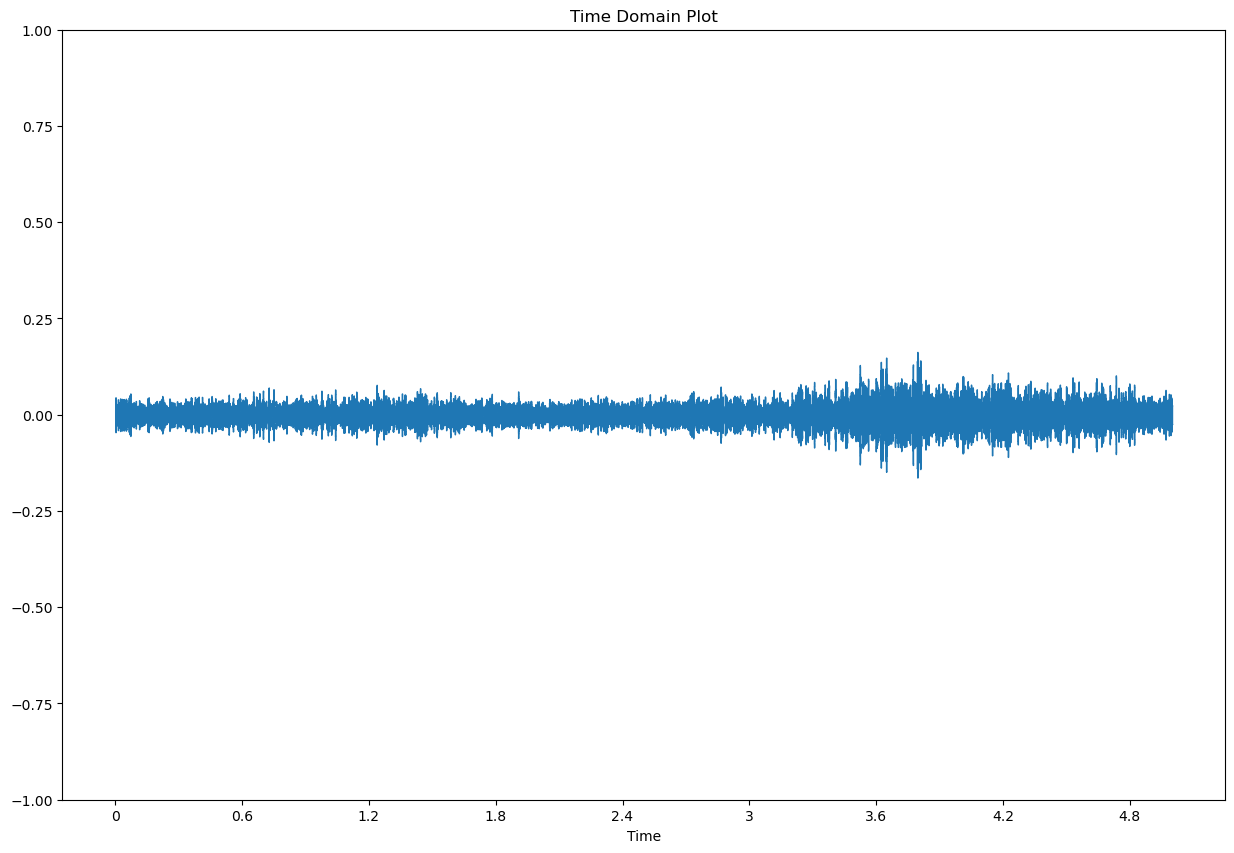

In [9]:
plt.figure(figsize=(15, 10))
librosa.display.waveshow(audio)
plt.title("Time Domain Plot")
plt.ylim((-1,1));

# Ampltiude Envelope

## 1. Calcuating Amplitude Envelope

In [10]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    for i in range (0, len(signal), hop_length):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)
    return np.array(amplitude_envelope)

In [11]:
ae_audio = amplitude_envelope(audio, FRAME_SIZE, HOP_LENGTH)

## 2. Visualzing Amplitude Envelope

In [12]:
frames = range(len(ae_audio))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

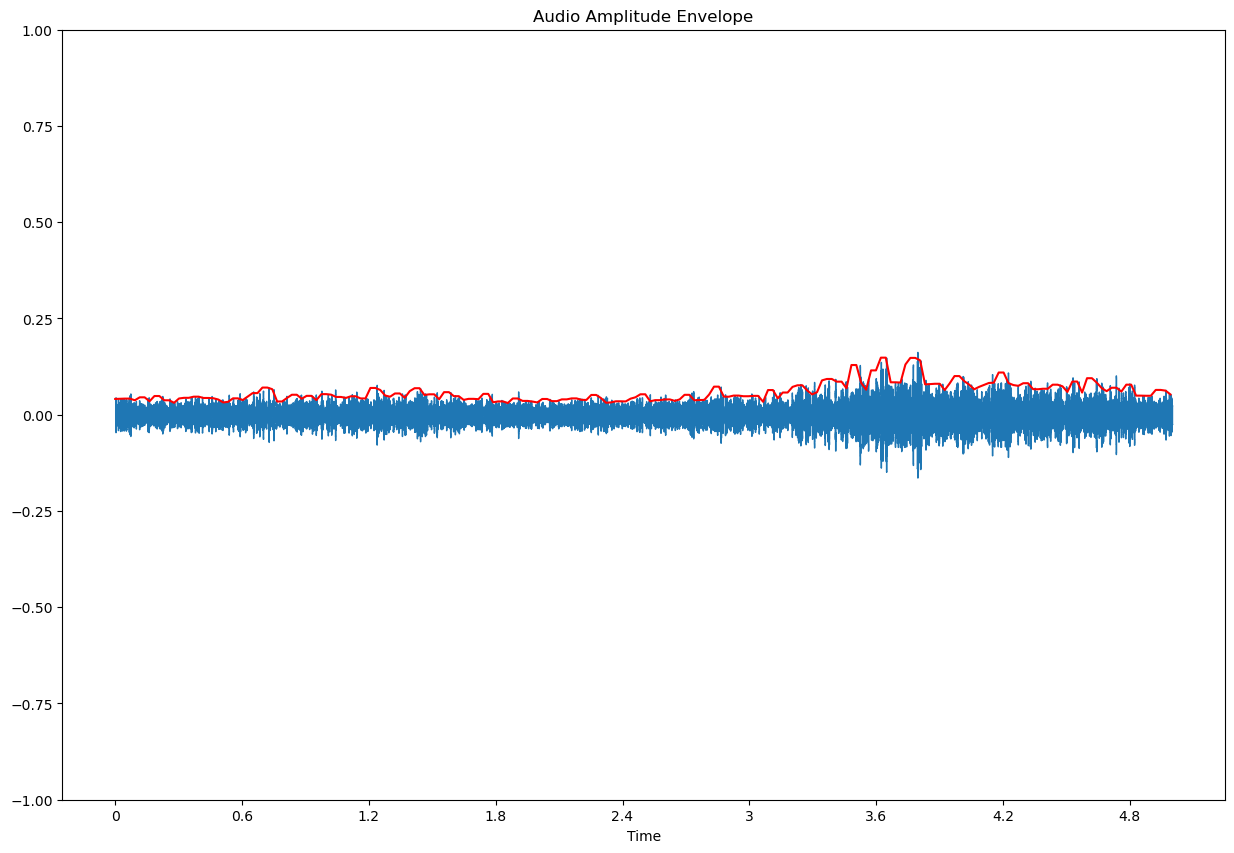

In [13]:
plt.figure(figsize = (15, 10))
librosa.display.waveshow(audio)
plt.plot(t, ae_audio, color = 'r')
plt.ylim((-1,1))
plt.title("Audio Amplitude Envelope");

# Root-mean-squared energy

In [14]:
rms_audio = librosa.feature.rms(y=audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

## 1. Visualize RMSE + waveform

In [15]:
frames = range(len(rms_audio))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

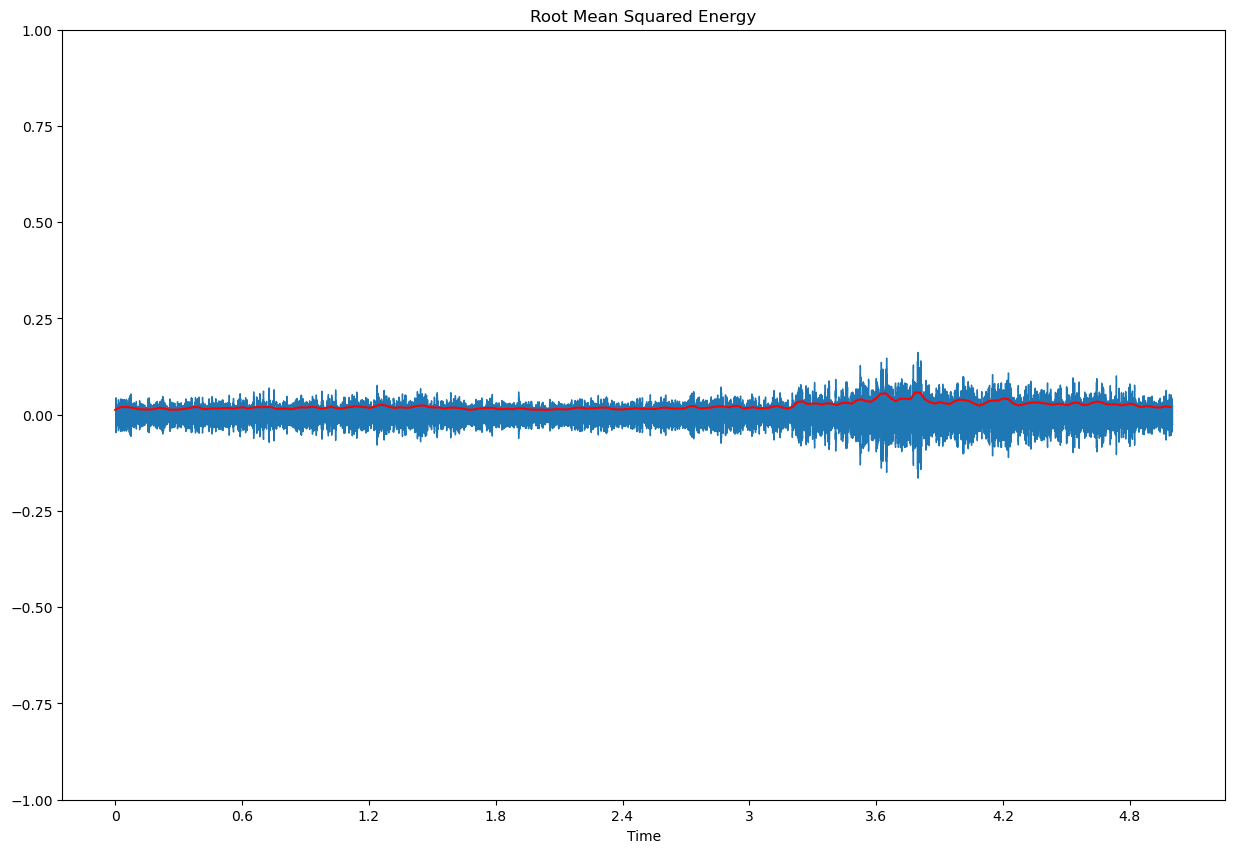

In [16]:
plt.figure(figsize = (15, 10))
librosa.display.waveshow(audio)
plt.plot(t, rms_audio, color = 'r')
plt.ylim((-1,1))
plt.title("Root Mean Squared Energy");

# Zero Crossing Rate

In [17]:
zcr_audio = librosa.feature.zero_crossing_rate(y=audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

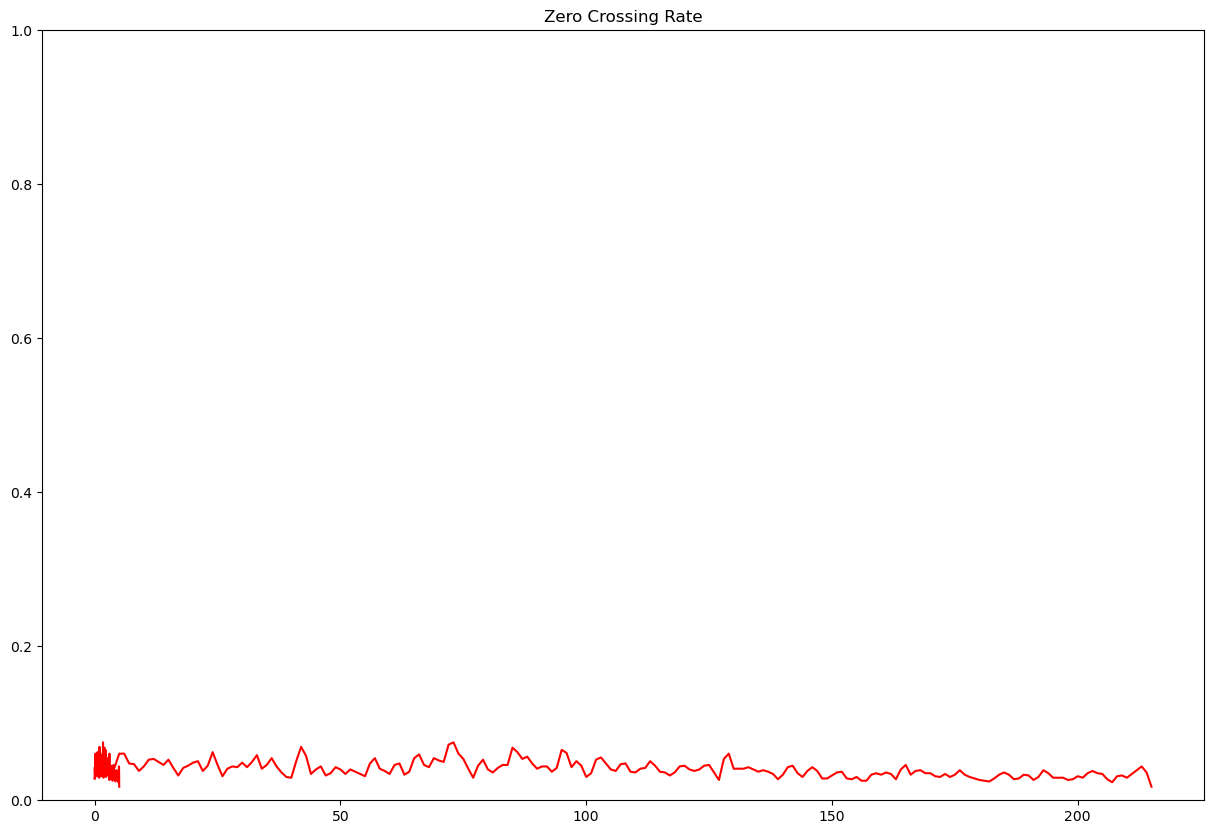

In [18]:
plt.figure(figsize = (15, 10))
plt.plot(t, zcr_audio, zcr_audio,color = 'r')
plt.ylim(0,1)
plt.title("Zero Crossing Rate");

# Extracting Short-Time Fourier Transform

In [19]:
S_scale = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

In [20]:
S_scale.shape

(513, 216)

# Calculating the spectrogram

`Spectrogram` is a visual representation that that shows how a frequency content of an audio changes over time.

In [21]:
Y_scale = np.abs(S_scale) ** 2

In [22]:
Y_scale.shape

(513, 216)

## Visualizing the spectogram

In [31]:
def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=HOP_LENGTH,
                            x_axis='time',
                            y_axis=y_axis)
    plt.colorbar(format="%+2.f")

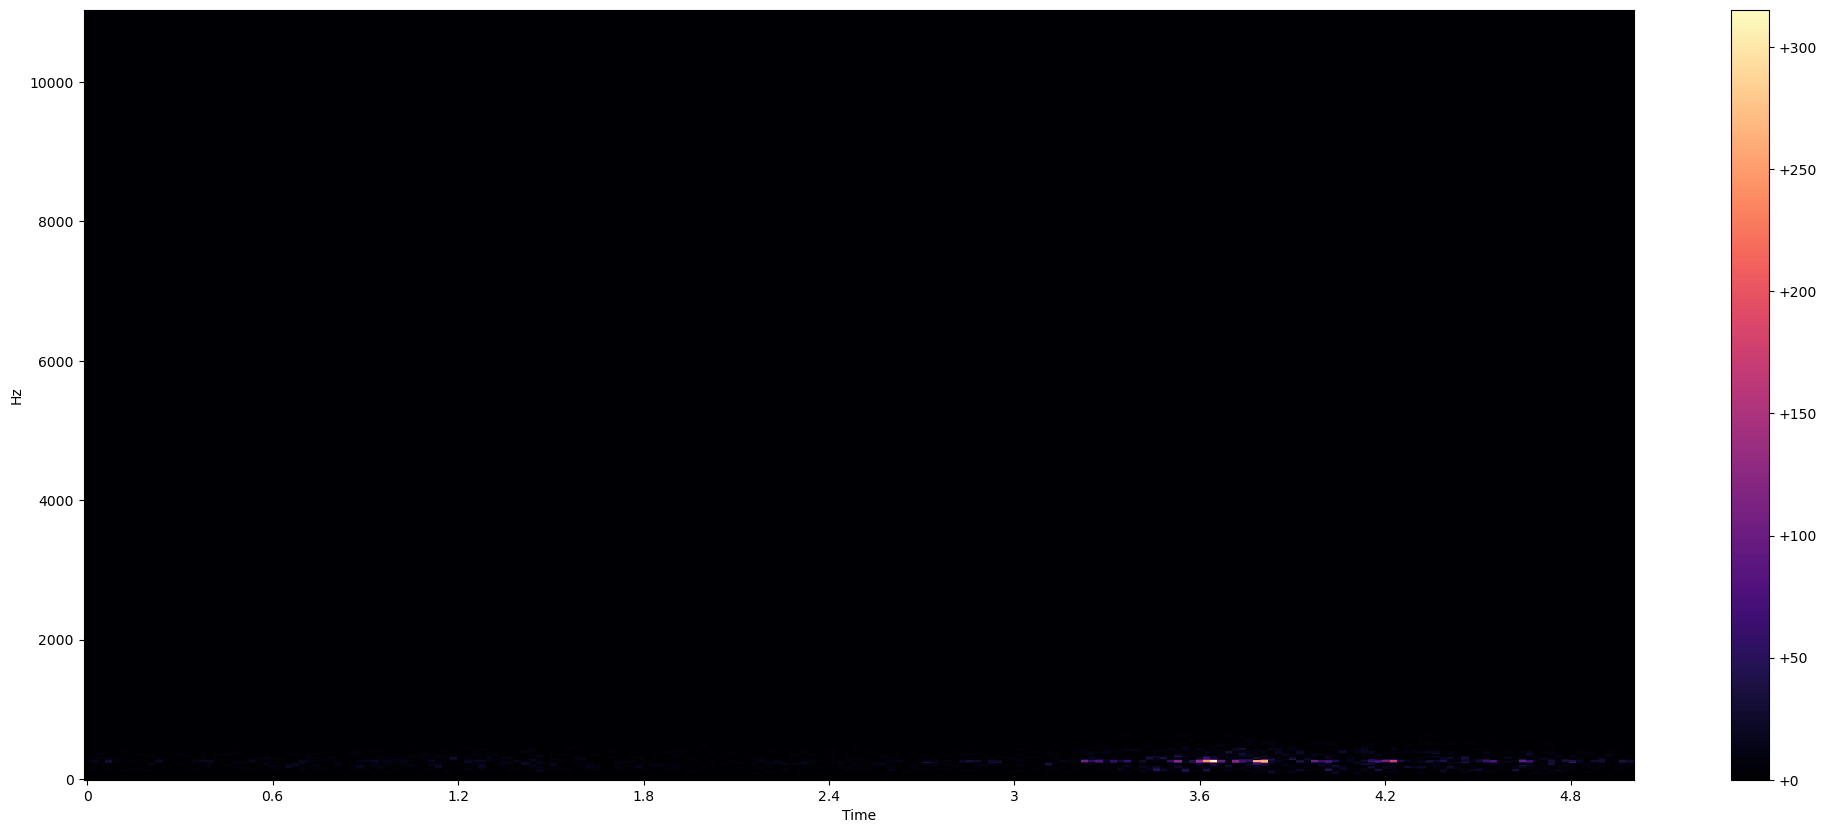

In [32]:
plot_spectrogram(Y_scale, sr, HOP_LENGTH)

## Log-Ampltiude Spectogram

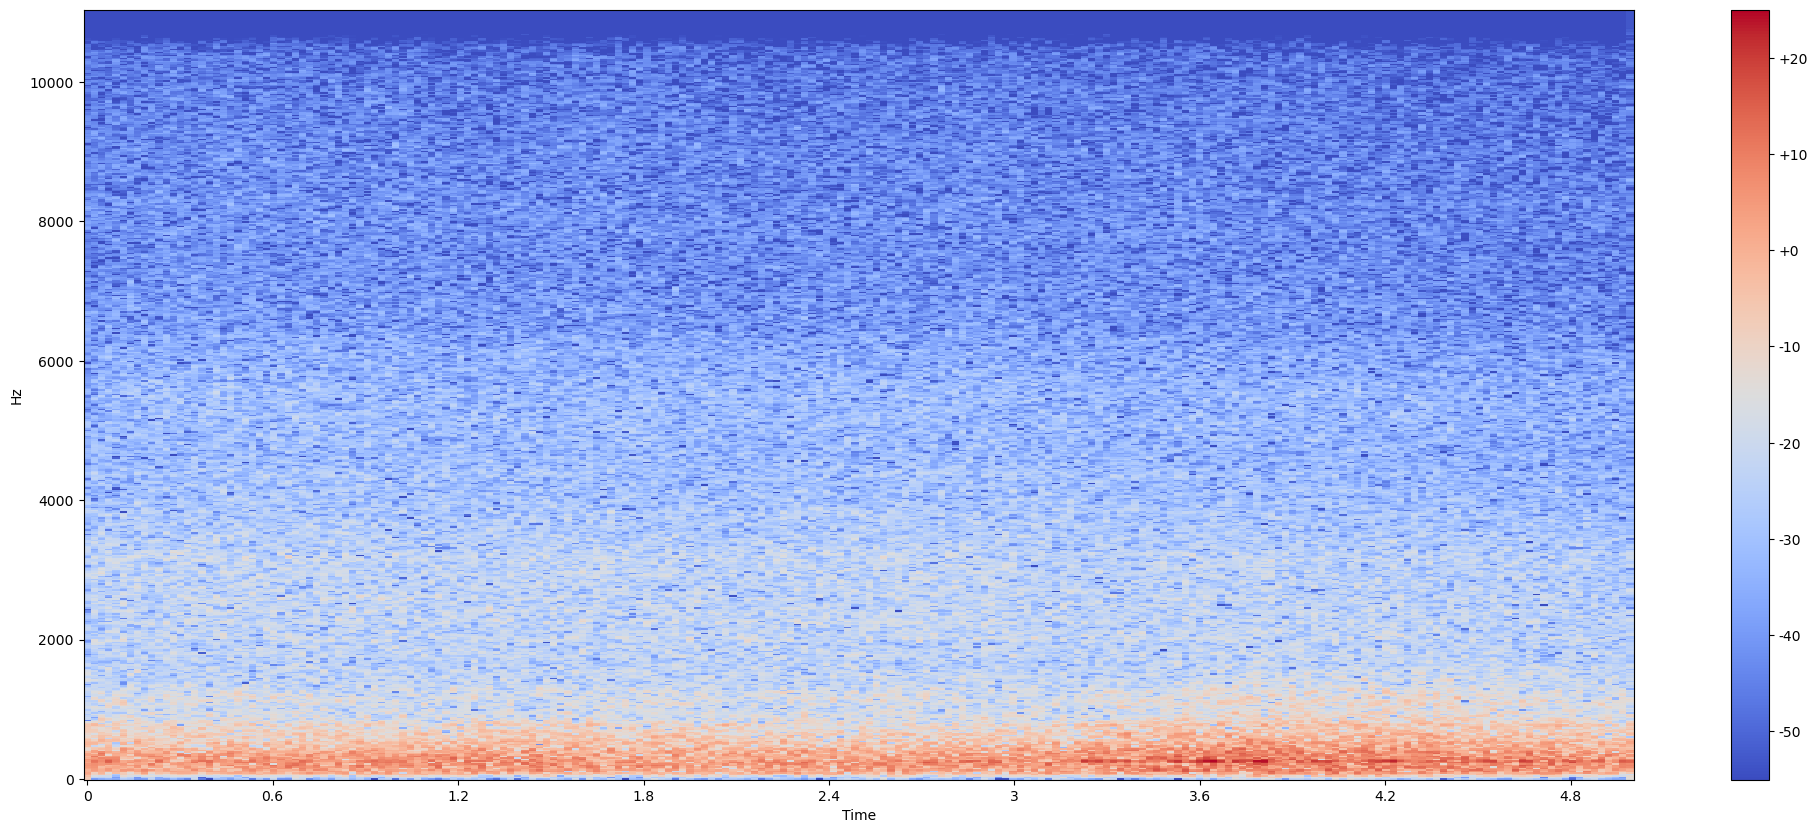

In [33]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_LENGTH)

## Log-Frequency Spectogram

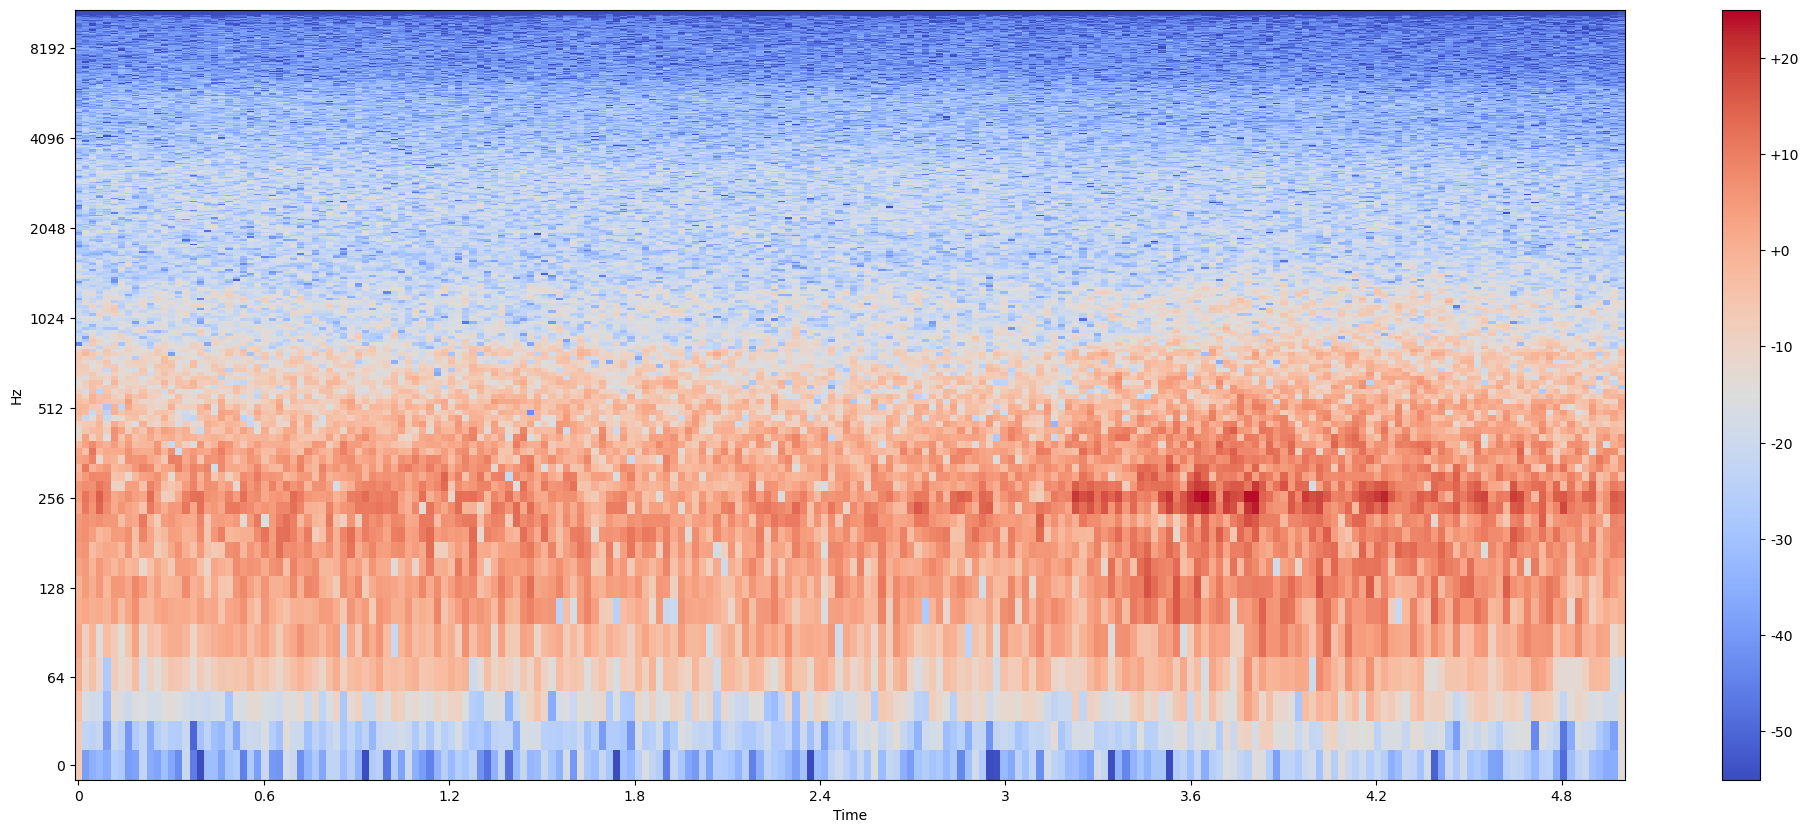

In [34]:
plot_spectrogram(Y_log_scale, sr, HOP_LENGTH, y_axis='log')

# Mel Spectograms
An idean audio feature includes:
* Time-frequency representation
* Perceptually-relevant amplitude representation
* Perceptually-relevant freqency representation

The first two can be attained using spectrograms and log-frequency spectrograms. While all the features can be visualized using `Mel Spectrograms`.

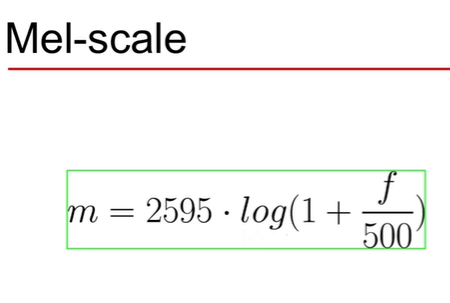


# Steps to extract Mel Spectrogram
1. Extract STFT
2. Convert amplitude to DBs
3. Convert frequencies to Mel Scale.

# Convert frequencies to Mel Scale
1. Choose number of `mel bands`.
2. Construct `mel filter banks`.
3. Apply `mel filter banks` to spectrogram.



# Mel Filter Banks

In [35]:
filter_banks = librosa.filters.mel(n_fft=FRAME_SIZE, sr=sr, n_mels=10)

In [36]:
filter_banks.shape

(10, 513)

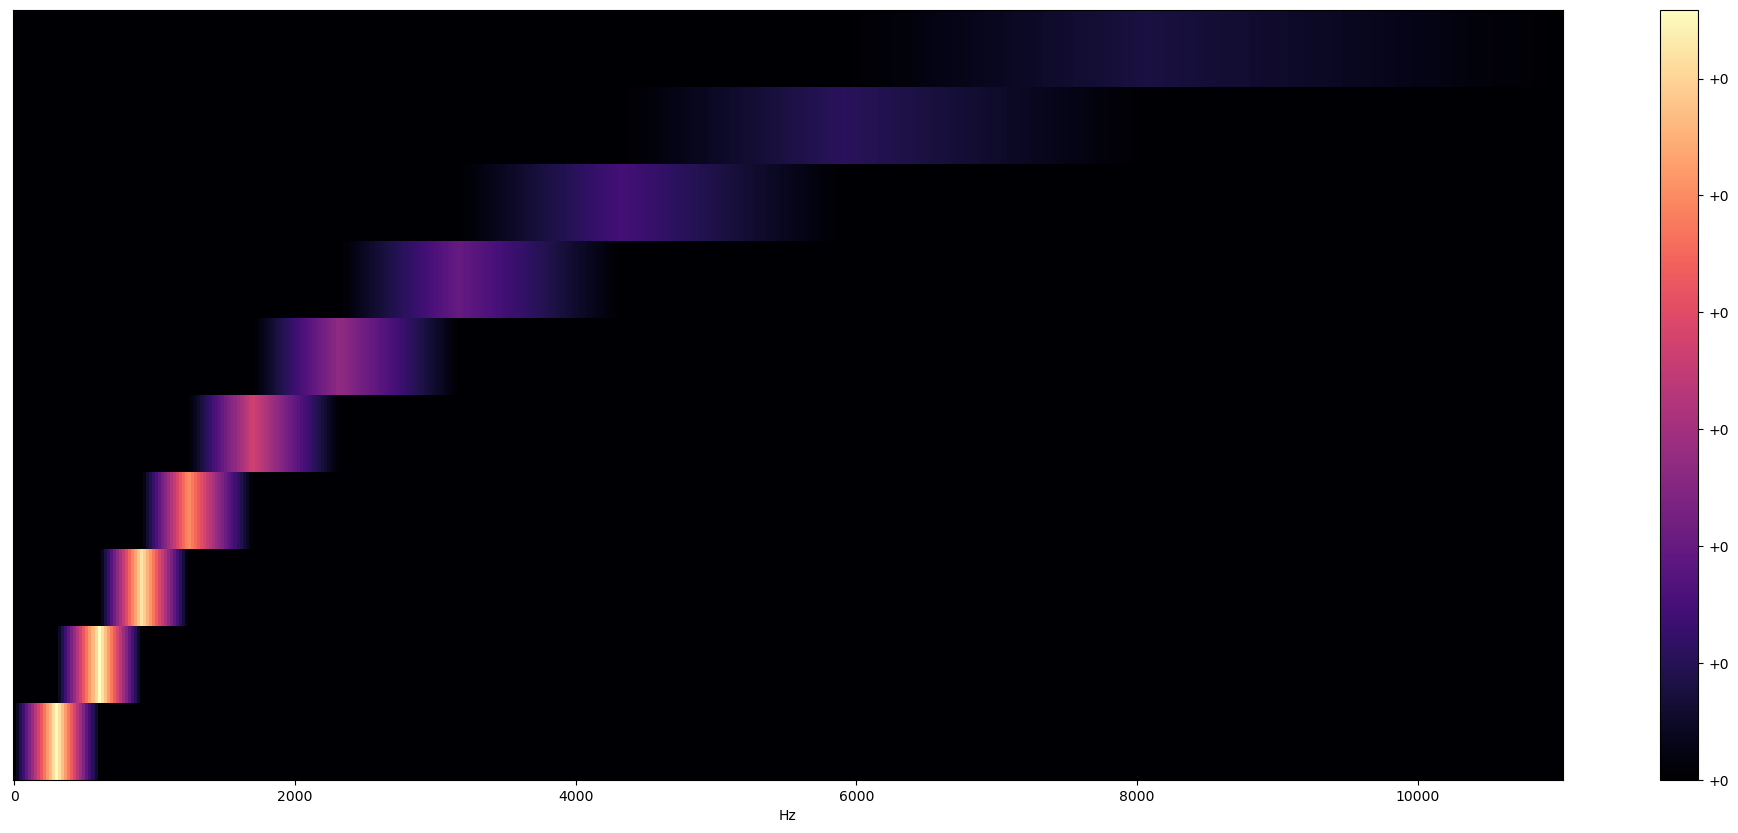

In [37]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                        sr=sr,
                        x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

# Extracting Mel Spectrogram

In [39]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio,
                                                sr=sr,
                                                n_fft=FRAME_SIZE,
                                                hop_length=HOP_LENGTH,
                                                n_mels=10)

In [40]:
mel_spectrogram.shape

(10, 216)

In [41]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

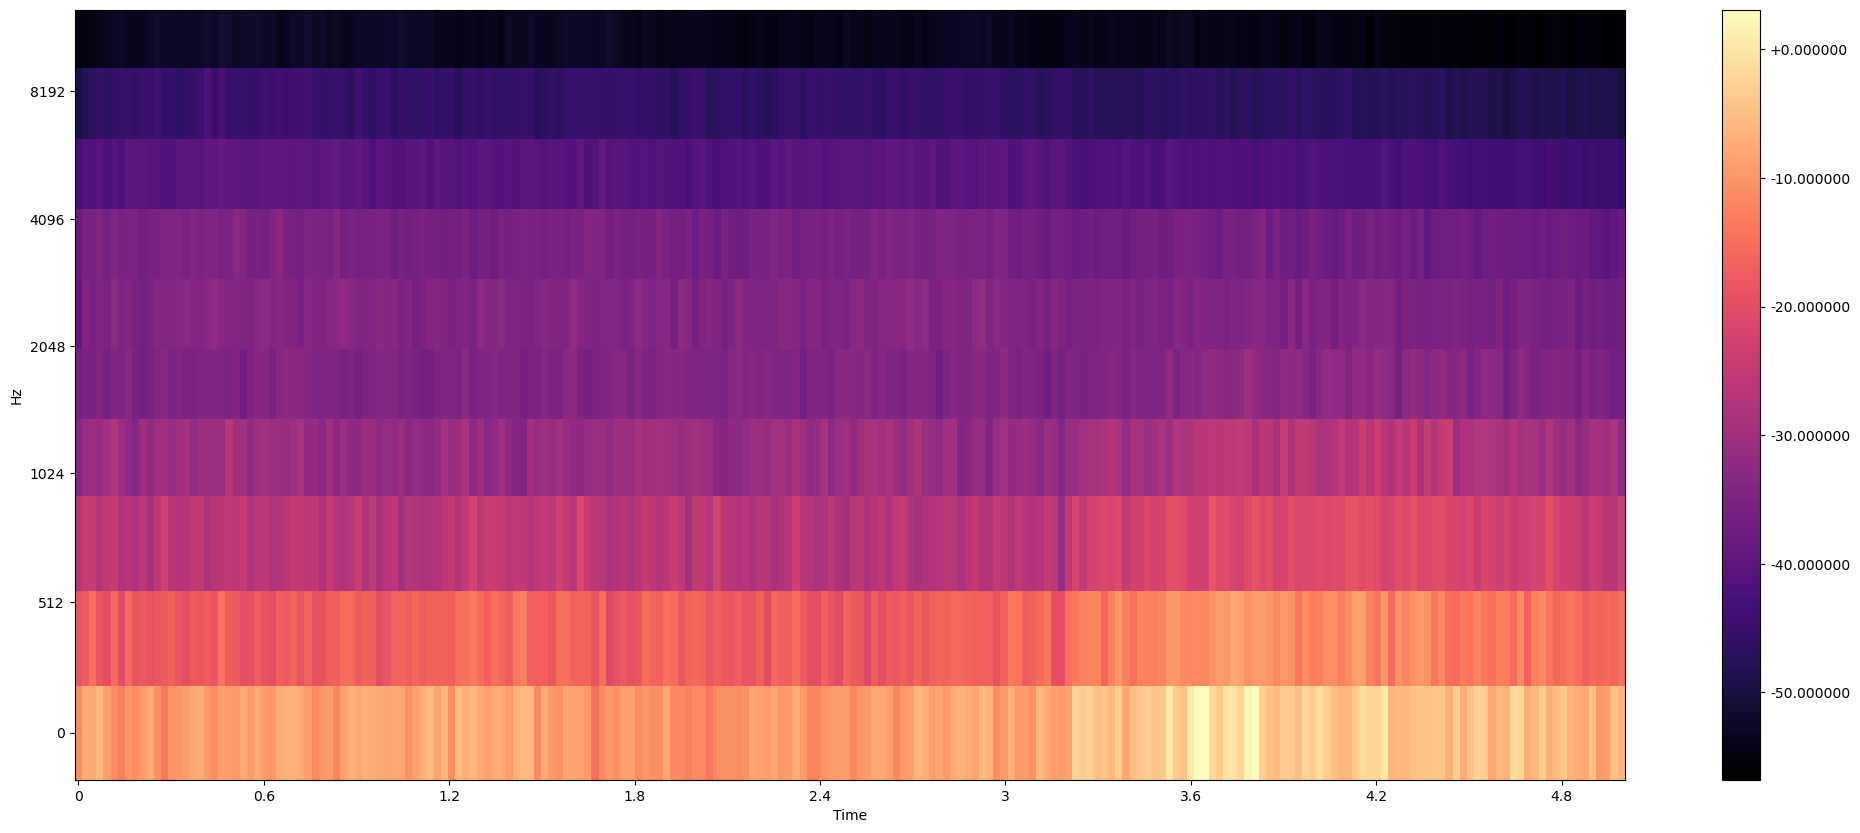

In [53]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                        x_axis="time",
                        y_axis="mel",
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show()

# Mel-Frequency Cepstral Coefficients

In [49]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio, n_mfcc=13, sr=sr)

In [50]:
mfccs.shape

(13, 216)

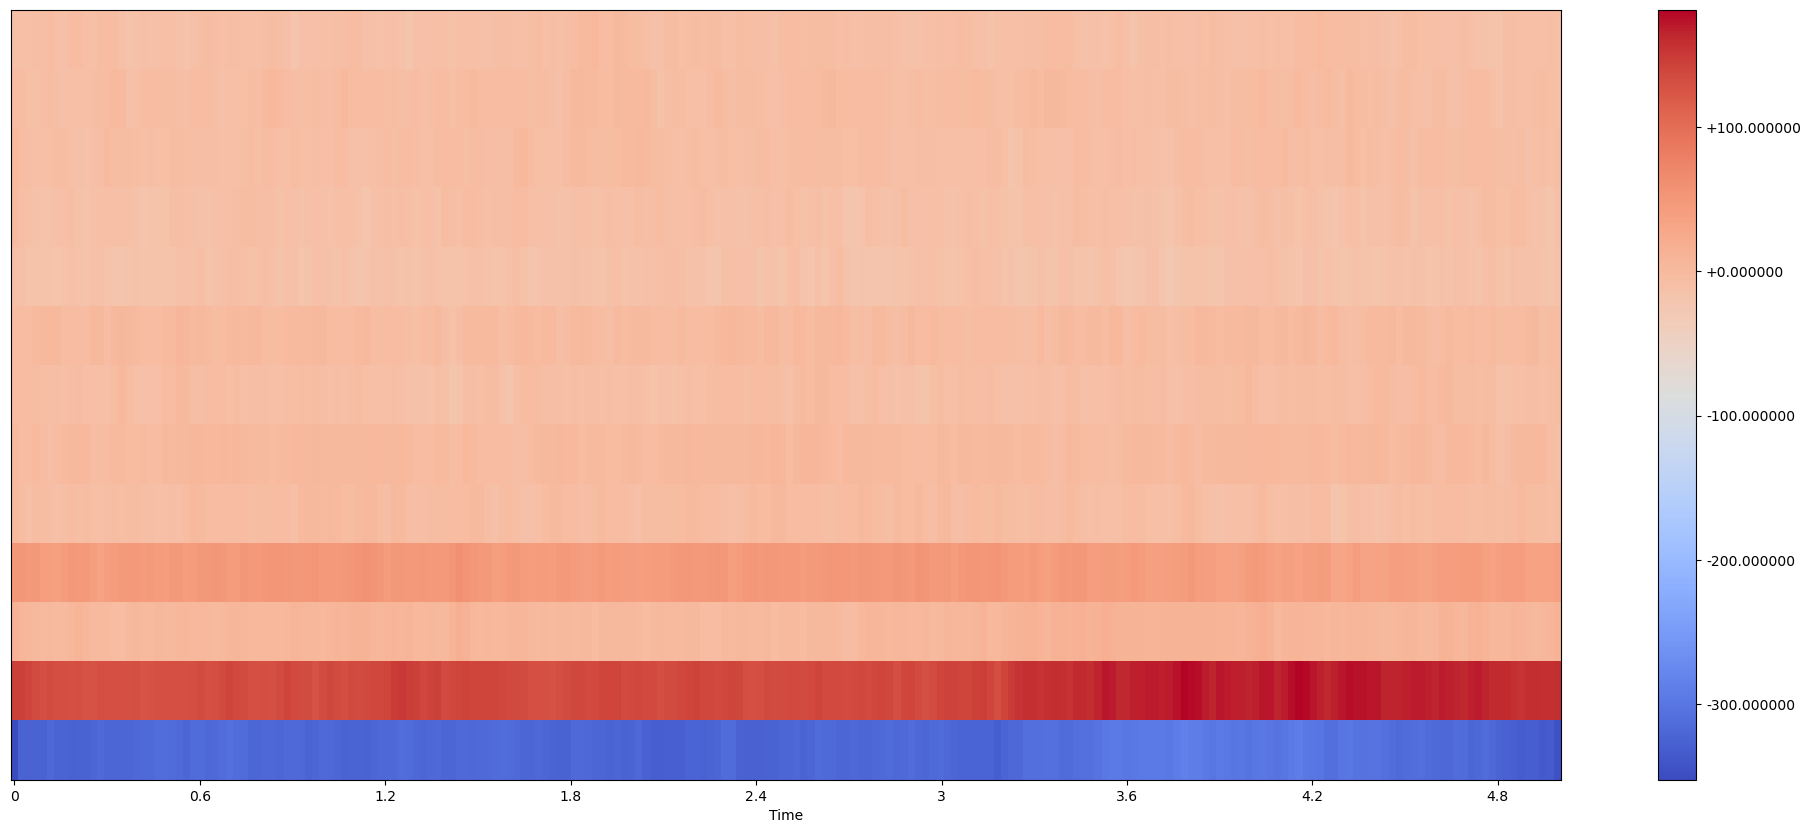

In [52]:
# Visualize MFFCs
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show()

In [54]:
# Calculate delta and delta2 MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [55]:
delta_mfccs.shape

(13, 216)

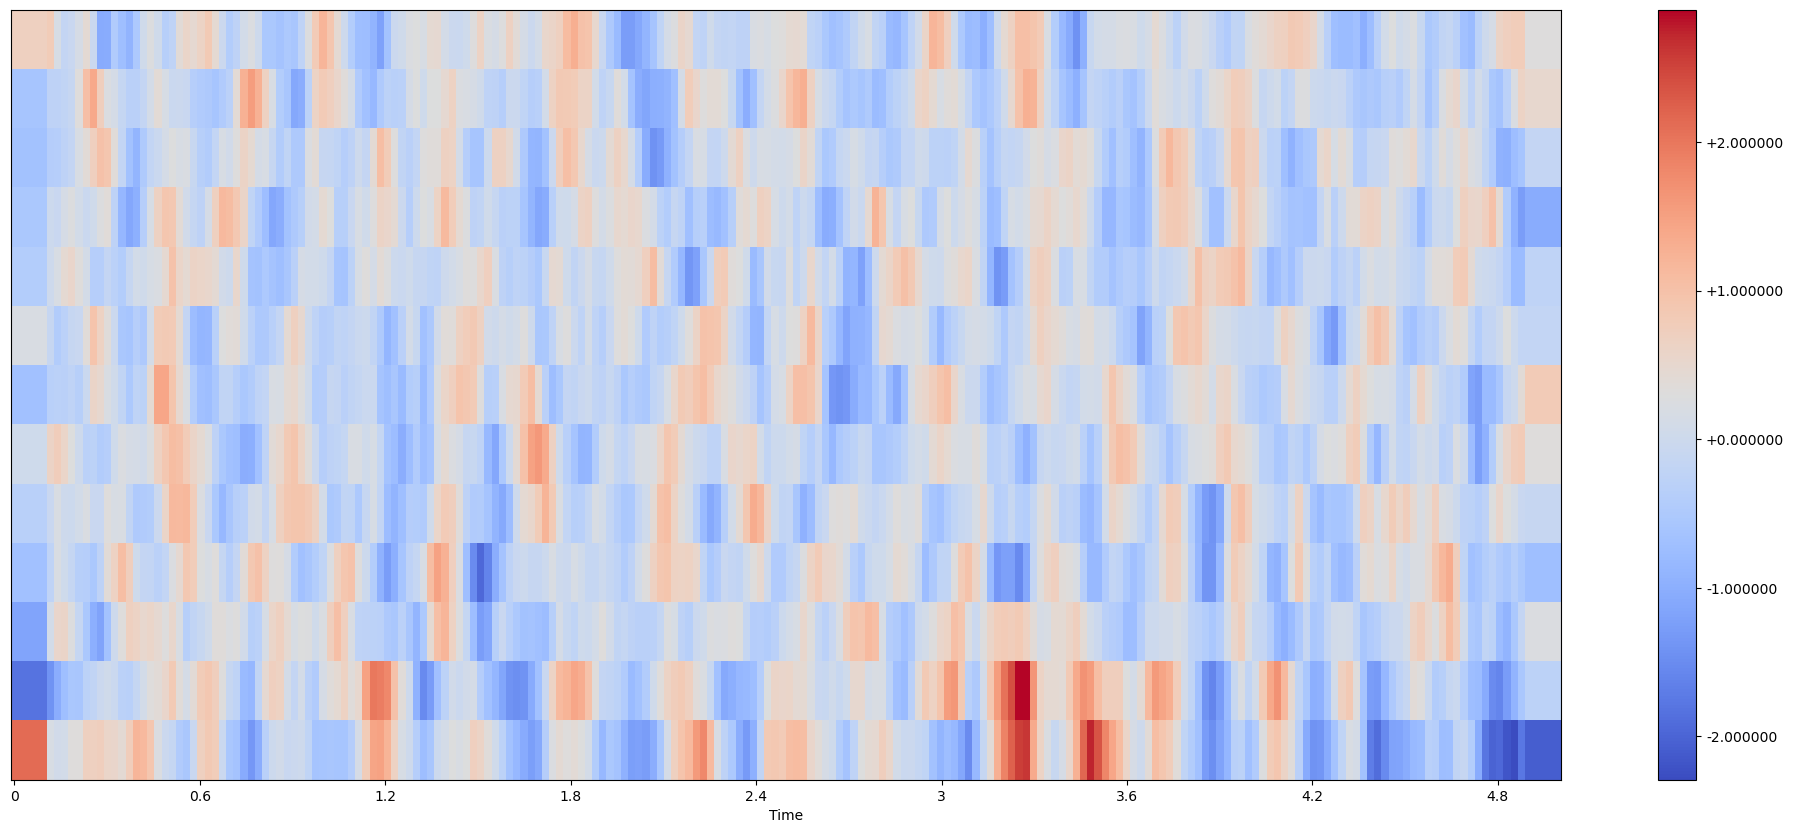

In [57]:
# Visualize MFFCs
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show()

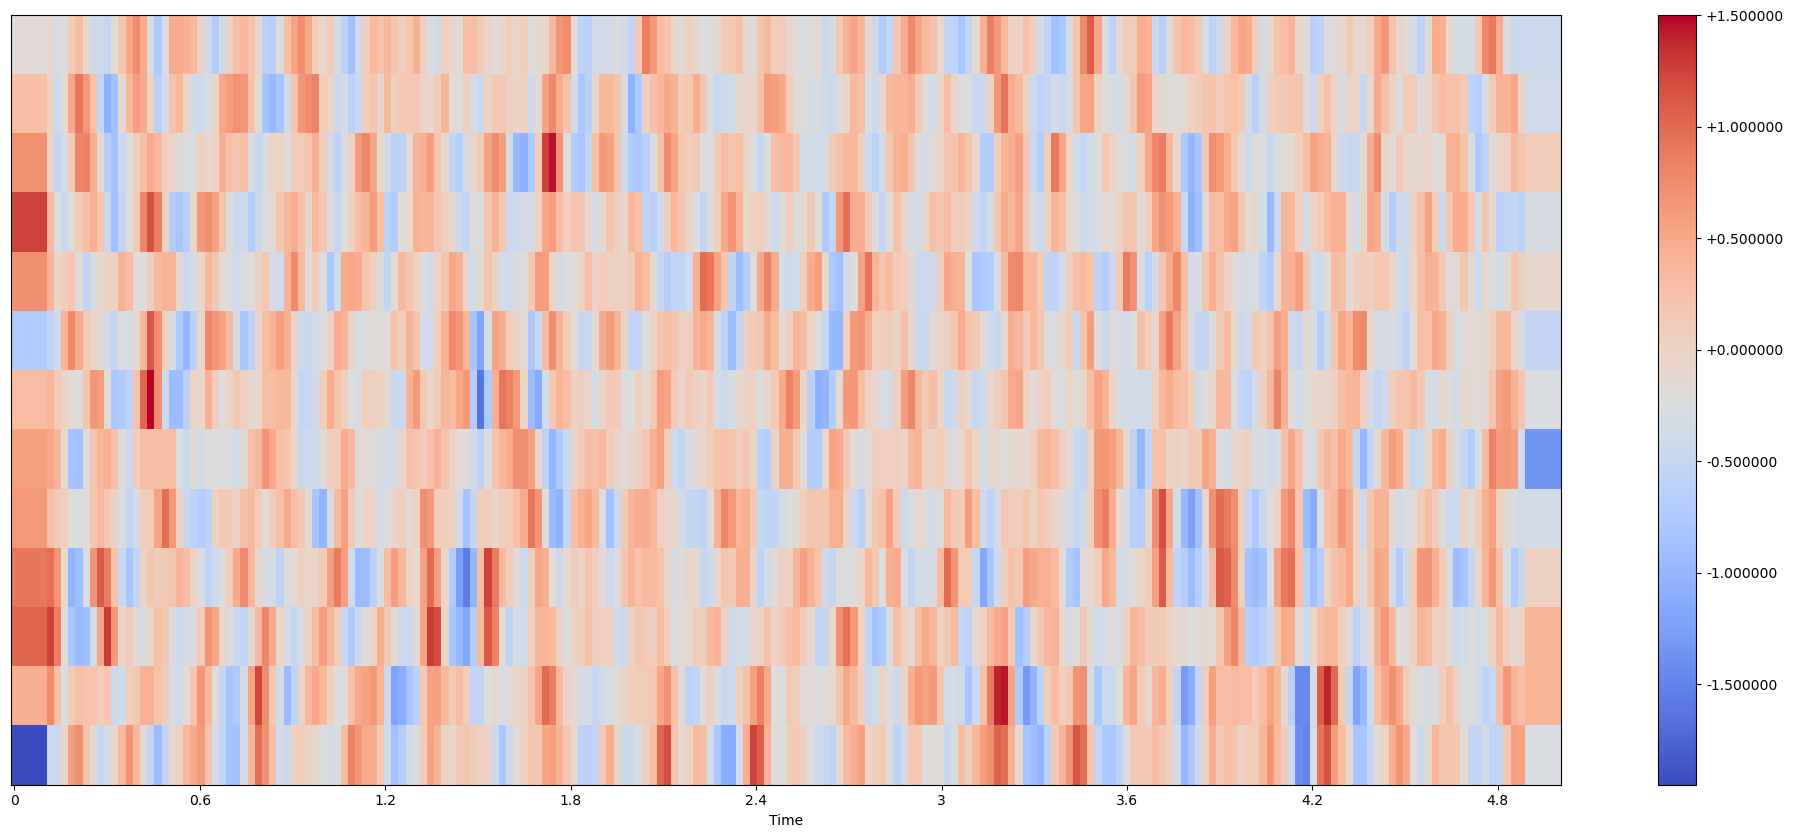

In [58]:
# Visualize MFFCs
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show()

# Band Energy Ratio

In [59]:
def calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate):
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / spectrogram.shape[0]
    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [60]:
split_frequency_bin = calculate_split_frequency_bin(S_scale, 2000, 22050)
print(split_frequency_bin)

93


In [61]:
def calculate_band_energy_ratio(spectrogram, split_frequency, sample_rate):
    split_frequency_bin = calculate_split_frequency_bin(S_scale, split_frequency, sample_rate)
    
    power_spec = np.abs(spectrogram) ** 2
    power_spec = power_spec.T
    band_energy_ratio = []
    
    # calculate BER for each frame
    for frequencies_in_frame in power_spec:
        sum_power_low_frequencies = np.sum(frequencies_in_frame[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(frequencies_in_frame[split_frequency_bin:])
        ber_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(ber_current_frame)
    
    return np.array(band_energy_ratio)


In [64]:
ber_audio = calculate_band_energy_ratio(S_scale, 2000, 22050)
ber_audio.shape

(216,)

# Visualize BER curves

In [68]:
frames = range(len(ber_audio))
t = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

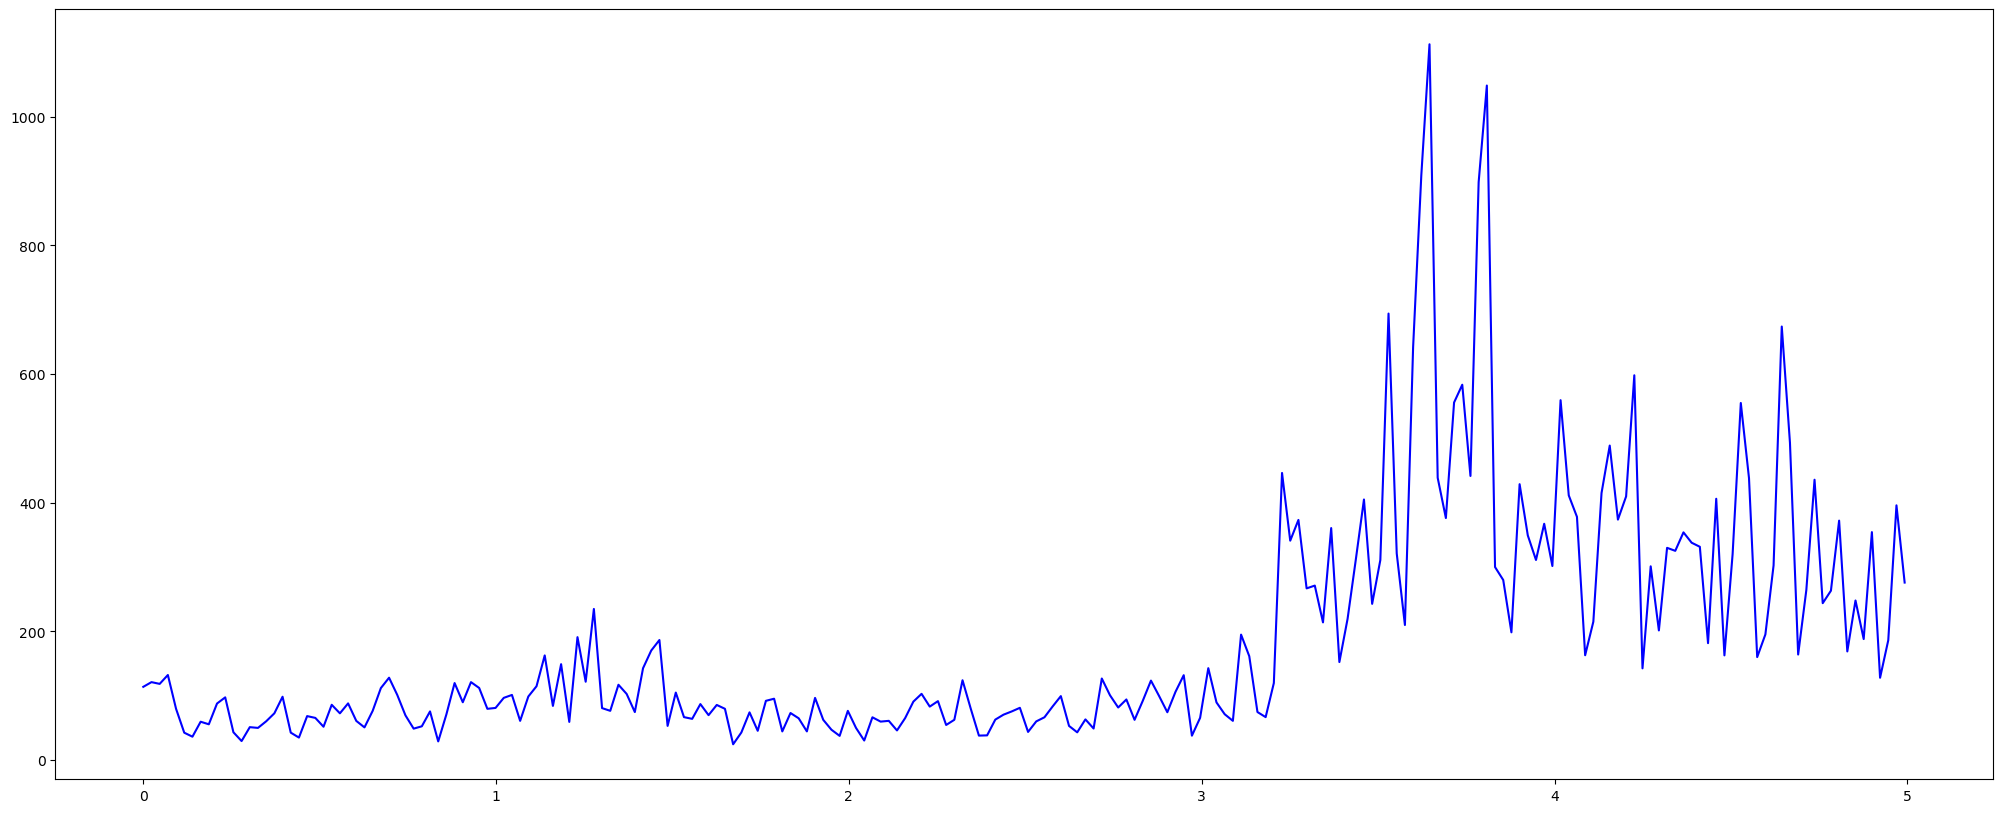

In [69]:
plt.figure(figsize=(25, 10))
plt.plot(t, ber_audio, color='b')
plt.show()

# Spectral Centroid

In [74]:
sc_audio = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [77]:
sc_audio.shape

(216,)

## Visualize Spectral Centroid

In [75]:
frames = range(len(sc_audio))
t = librosa.frames_to_time(frames)

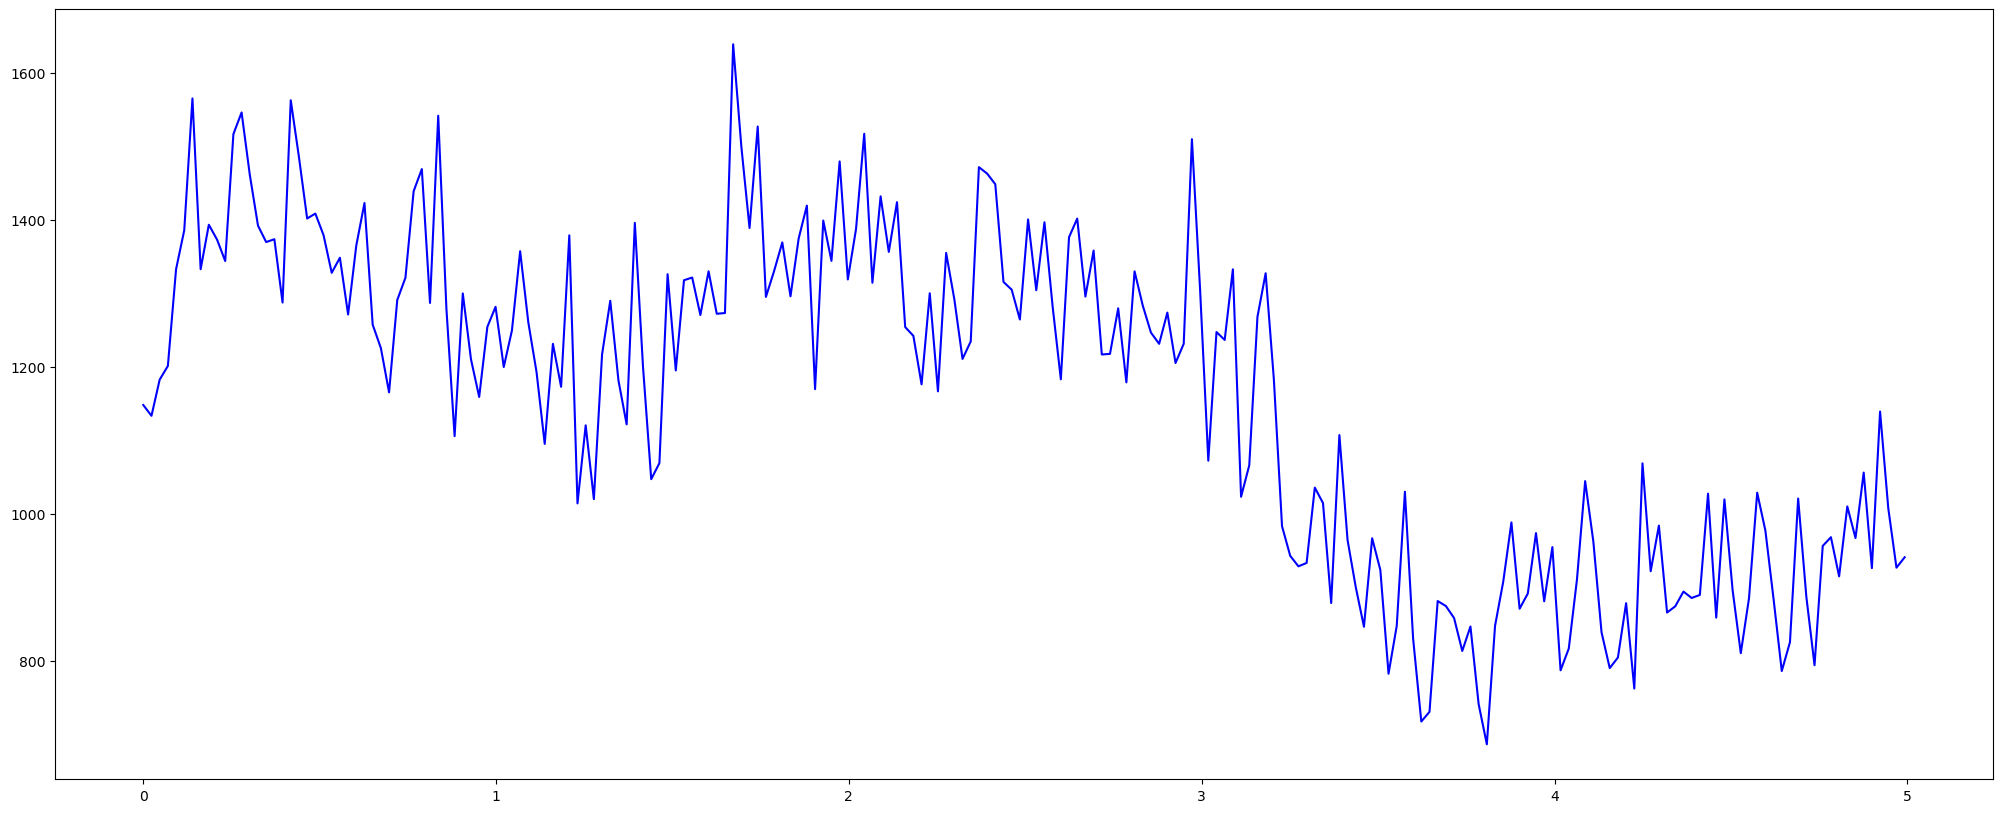

In [76]:
plt.figure(figsize=(25, 10))
plt.plot(t, sc_audio, color='b')
plt.show()

# Bandwidth

In [79]:
sb_audio = librosa.feature.spectral_bandwidth(y=audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

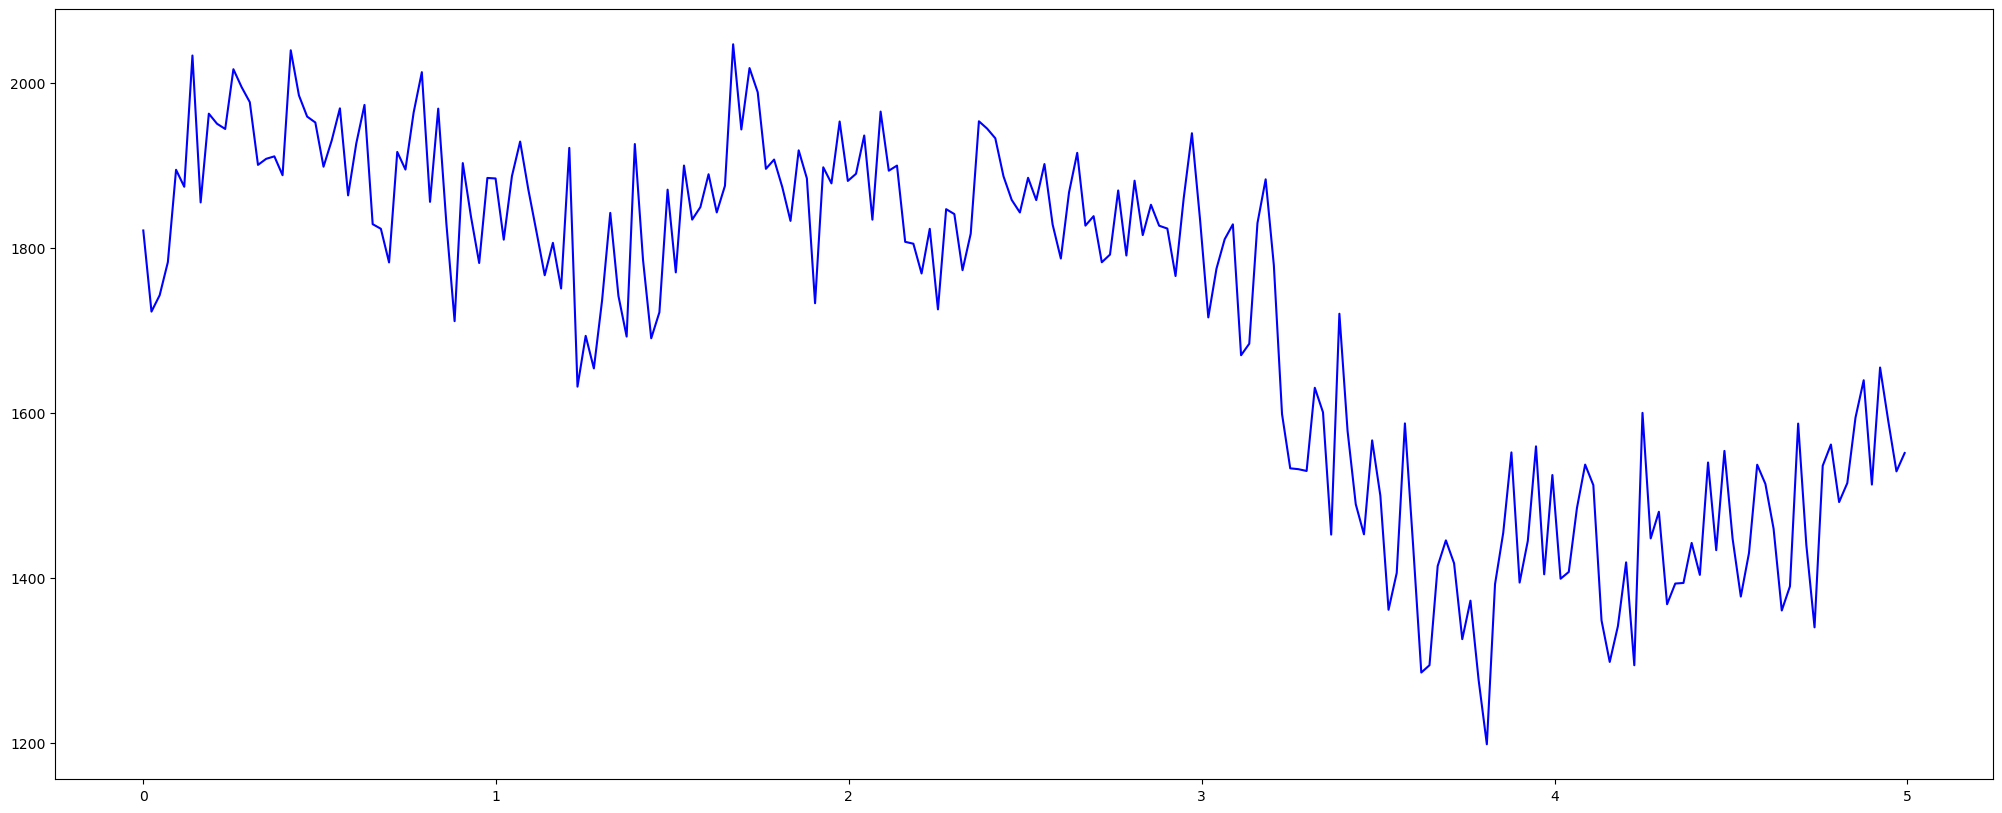

In [80]:
plt.figure(figsize=(25, 10))
plt.plot(t, sb_audio, color='b')
plt.show()